In [4]:
import numpy as np
import pandas as pd

In [7]:
modi = pd.read_csv('https://github.com/skathirmani/datasets/raw/master/narendramodi_tweets.csv')

In [8]:
modi.head(5)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [15]:
modi.shape

(3220, 15)

In [14]:
modi.dtypes

id                             float64
retweets_count                 float64
favorite_count                 float64
created_at                      object
text                            object
lang                            object
retweeted                         bool
followers_count                float64
friends_count                  float64
hashtags_count                 float64
description                     object
location                        object
background_image_url            object
source                          object
date                    datetime64[ns]
dtype: object

In [12]:
modi['date']=pd.to_datetime(modi["created_at"],format='%Y-%m-%d %H:%M:%S')
modi['date'].head()

0   2017-01-31 11:00:07
1   2017-01-31 10:59:12
2   2017-01-31 10:52:33
3   2017-01-31 10:52:22
4   2017-01-31 10:52:16
Name: date, dtype: datetime64[ns]

In [13]:
modi['date'].min(),modi['date'].max()

(Timestamp('2016-03-09 12:22:10'), Timestamp('2017-01-31 11:00:07'))

# Bag of words : Word count

In [10]:
#!pip install wordcloud

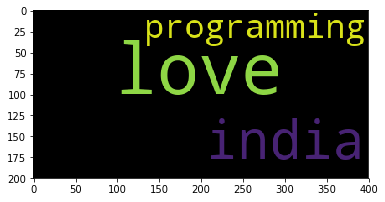

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc=WordCloud().generate('i love india. i love programming')
plt.imshow(wc)#the word that is reapeadted more will be big so from this we can know what is the word thta is used more frequently

In [21]:
#joining  words
''.join(['i','love','myself'])

'ilovemyself'

In [22]:
#joining  words with space
' '.join(['i','love','myself'])

'i love myself'

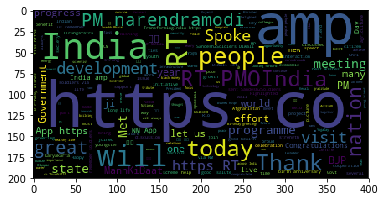

In [23]:
#' '.join(modi['text'])
wc=WordCloud().generate(' '.join(modi['text']))
plt.imshow(wc)

# Text Transformations or text cleaning
- convert every character to lower case
- remove special characters,numbers
- remove common stop words(ex: of ,the,is,was etc)
- remove junk words(ex:amp,rt,https)
- identify root of the word(stemming)

In [24]:
#convert every character to lower case
#we can take everythong in lower or upper case we take loweer bcz it is easy to read
docs = modi['text'].str.lower()
docs.head()

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

# Regular Expression
- remove special characters,numbers

In [29]:
docs.str.replace('the','-').head()#replace 'the' with '-'
docs.str.replace('rt','').head()#empty string removes that particular character
docs.str.replace('[a-z]','').head()#remove all the alphabets
docs.str.replace('[0-9]','-').head()#remove all numbers

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

In [33]:
#instaed of specifying what to remove nad do the operations
# we can say give only words
docs.str.replace('[^a-z]','').head()#retain alphabets remove everything
docs.str.replace('[^a-z ]','').head()#retain alphabets, space and remove everything
docs.str.replace('[^a-z #@]','').head()#retain alphabets, spaces,# , @  and remove everything

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

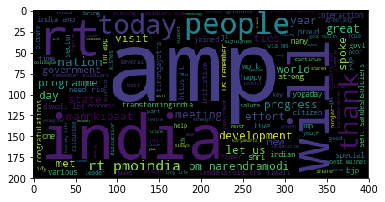

In [34]:
#with the data
docs =docs.str.replace('[^a-z #@]','')#retain alphabets, spaces,# , @  and remove everything
wc=WordCloud().generate(' '.join(docs))
plt.imshow(wc)


- remove common stop words(ex: of ,the,is,was etc)

In [54]:
import nltk
#nltk.download('stopwords')

In [42]:
stop_words = nltk.corpus.stopwords.words('english')
#len(stop_words)
junk_words =['amp','rt','https','will']
stop_words.extend(junk_words)
len(stop_words)

183

In [44]:
x =[1,2,3,4]
y =[5,6,7]

In [50]:
 x.extend(y)
x

[1, 2, 3, 4, [5, 6, 7], [5, 6, 7], [5, 6, 7], [5, 6, 7], 5, 6, 7]

In [52]:
def clean_text(row_text):
   # print(type(row_text))
    row_words = row_text.split(' ')
    print(row_words)
    print('-----')

docs.apply(lambda v: clean_text(v))

['the', 'presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'amp', 'the', 'efforts', 'towards', '#transformingindia']
-----
['rashtrapati', 'jis', 'address', 'to', 'both', 'houses', 'of', 'parliament', 'was', 'indepth', 'amp', 'extensive', 'do', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
-----
['rt', '@pmoindia', 'empowering', 'the', 'marginalised', 'httpstcowwsqgwdk']
-----
['rt', '@pmoindia', 'commitment', 'to', 'welfare', 'of', 'farmers', 'httpstcopaafrfmrc']
-----
['rt', '@pmoindia', 'improving', 'the', 'quality', 'of', 'life', 'for', 'the', 'poor', 'httpstcougmvkz']
-----
['rt', '@pmoindia', 'financial', 'inclusion', 'for', 'poverty', 'alleviation', 'httpstcoxtzyhhte']
-----
['rt', '@rashtrapatibhvn', 'the', 'fourdecade', 'old', 'demand', 'of', 'onerankonepension', 'orop', 'of', 'our', 'armed', 'forces', 'veterans', 'has', 'been', 'fulfilled', '#presidentmu']
-----
['rt', '@rashtrapatibhvn', 'my', 'government', 'has', '

-----
['talked', 'about', 'aspects', 'relating', 'to', 'judiciary', 'amp', 'appreciated', 'role', 'of', 'the', 'legal', 'fraternity', 'in', 'furthering', 'adr', 'framework', 'httpstcogxnicwi']
-----
['joined', 'the', 'programme', 'to', 'mark', 'the', 'th', 'anniversary', 'of', 'the', 'delhi', 'high', 'court', 'congratulated', 'everyone', 'associated', 'with', 'the', 'court', 'over', 'the', 'years']
-----
['rt', '@mibindia', 'a', 'tribute', 'to', 'iron', 'man', 'of', 'india', '#sardarvallabhbhaipatel', 'on', '#ektadiwas', 'today', 'for', 'welding', 'us', 'into', 'a', 'single', 'nation', '', 'https']
-----
['today', 'a', 'day', 'after', 'diwali', 'gujaratis', 'mark', 'the', 'start', 'of', 'a', 'new', 'year', 'saal', 'mubarak', 'to', 'gujaratis', 'across', 'the', 'world', 'may', 'this', 'be', 'a', 'joy', 'filled', 'year']
-----
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
-----
['paid', 'floral', 'tributes', 'to', 'the', 'great', 'sardar

-----
['we', 'strongly', 'condemn', 'the', 'attack', 'on', 'american', 'university', 'in', 'kabul', 'condolences', 'to', 'the', 'bereaved', 'families', 'amp', 'prayers', 'with', 'the', 'injured']
-----
['', '', '', '', '', '', '', '', '', 'janmashtami', 'greetings', 'to', 'all']
-----
['my', 'colleague', '@druditraj', 'participated', 'in', 'the', '#tirangayatra', 'across', 'his', 'constituency', 'in', 'delhi', 'httpstcocrvizgvndi']
-----
['discussed', 'aadhaar', 'related', 'matters', 'glad', 'that', 'in', 'aadhaar', 'enrolment', 'special', 'attention', 'is', 'being', 'given', 'to', 'northeast', 'httpstcoeyqtbwvjc']
-----
['was', 'apprised', 'of', 'the', 'progress', 'made', 'in', 'improving', 'accessibility', 'in', 'schools', 'public', 'buildings', 'amp', 'railway', 'stations', 'as', 'part', 'of', '@msjeaic']
-----
['urged', 'officials', 'to', 'systematize', 'the', 'measures', 'to', 'address', 'grievances', 'of', 'students', 'amp', 'ensure', 'they', 'do', 'not', 'face', 'any', 'difficul

-----
['rt', '@cmofkarnataka', '#internationaldayofyoga', 'httpstcobykrfcyga']
-----
['rt', '@railminindia', 'mr', '@sureshpprabhu', 'amp', 'honble', 'cmap', 'shri', '@ncbn', 'on', 'the', 'occasion', 'of', '#yogaday', 'httpstcohikhekrle']
-----
['rt', '@ncbn', 'on', 'international', 'yoga', 'day', 'let', 'us', 'vow', 'to', 'bring', 'healthy', 'living', 'amp', 'wellness', 'into', 'our', 'lives', 'through', '#yoga', 'meditation', 'or', 'any', 'physical']
-----
['rt', '@vasundharabjp', 'thousands', 'in', '#rajasthan', 'joined', 'the', 'world', 'in', 'celebrating', 'the', 'power', 'of', 'yoga', '#yogaday', '#worldwithyoga', '#idy', 'httpstco']
-----
['rt', '@drramansingh', '', '', '', '', '', '', '', '', '@piyushgoyal', '', '', '', '', '#yogaday', '#idy', 'https']
-----
['rt', '@chouhanshivraj', 'celebrated', 'the', 'nd', '#internationaldayofyoga', 'with', 'my', 'new', 'friends', 'here', 'in', 'beijing', 'yoga', 'connects', 'people', 'hearttoheart', 'ht']
-----
['rt', '@anandibenpatel', 'c

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
3190    None
3191    None
3192    None
3193    None
3194    None
3195    None
3196    None
3197    None
3198    None
3199    None
3200    None
3201    None
3202    None
3203    None
3204    None
3205    None
3206    None
3207    None
3208    None
3209    None
3210    None
3211    None
3212    None
3213    None
3214    None
3215    None
3216    None
3217    None
3218    None
3219    None
Name: text, Length: 3220, dtype: object

In [53]:
def clean_text(row_text):
   # print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words =[word for word in row_words if word not in stop_words]
    print(row_words)
    print('-----')

docs.apply(lambda v: clean_text(v))

['presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'efforts', 'towards', '#transformingindia']
-----
['rashtrapati', 'jis', 'address', 'houses', 'parliament', 'indepth', 'extensive', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
-----
['@pmoindia', 'empowering', 'marginalised', 'httpstcowwsqgwdk']
-----
['@pmoindia', 'commitment', 'welfare', 'farmers', 'httpstcopaafrfmrc']
-----
['@pmoindia', 'improving', 'quality', 'life', 'poor', 'httpstcougmvkz']
-----
['@pmoindia', 'financial', 'inclusion', 'poverty', 'alleviation', 'httpstcoxtzyhhte']
-----
['@rashtrapatibhvn', 'fourdecade', 'old', 'demand', 'onerankonepension', 'orop', 'armed', 'forces', 'veterans', 'fulfilled', '#presidentmu']
-----
['@rashtrapatibhvn', 'government', 'taken', 'bold', 'decisions', 'interest', 'poor', '#presidentmukherjee']
-----
['@rashtrapatibhvn', 'proactive', 'act', 'east', 'policy', 'govt', 'focussing', 'reducing', 'isolation', 'eastern', 'region', 

-----
['spoke', 'vitality', 'social', 'infrastructure', 'farmer', 'welfare', 'centres', 'anticorruption', 'measures', 'help', 'youth', 'httpstcowixpc']
-----
['aiims', 'bathinda', 'benefit', 'people', 'add', 'strength', 'endeavour', 'create', 'healthy', 'punjab', 'httpstcooifkkrpul']
-----
['pictures', 'punjab', 'visit', 'httpstcoevgcdkers']
-----
['pictures', 'punjab', 'visit', 'httpstcorgpigahkz']
-----
['happy', 'know', 'mobile', 'banking', 'convenient', 'indeed', 'httpstcoyjsdmbdt']
-----
['glad', 'could', 'help', 'keep', 'inspire', 'others', 'well', 'httpstcokftmhgty']
-----
['interesting', 'know', 'good', 'signs', 'httpstcoofrxswv']
-----
['well', 'pointed', 'brings', 'safety', 'convenience', 'one', 'ask', 'httpstcokuantlnr']
-----
['reached', 'hyderabad', 'take', 'part', 'dgpigp', 'conference', 'httpstcoumspvwrm']
-----
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'httpstconuxluzahp']
-----
['remembered', 'dr', 'babasaheb', 'ambedkar', 'pioneering', 'efforts'

-----
['gratitude', 'birthday', 'greetings', 'httpstcojsijrnneo']
-----
['thank', 'wishes', 'httpstcokczfokduu']
-----
['gratitude', 'wishes', 'httpstcopvojtmi']
-----
['thank', 'much', 'httpstcocpehexvl']
-----
['', '', '', '', 'httpstcobavbuarpdm']
-----
['', '', '', '', '', '', '', '', 'httpstcojsjuuwojd']
-----
['thank', 'good', 'wishes', 'httpstcowylxefwysc']
-----
['thank', 'much', 'httpstcoxsygalkky']
-----
['ananth', 'ji', 'gratitude', 'greetings', 'httpstcotrfqtdt']
-----
['thank', 'maneka', 'ji', 'birthday', 'wishes', 'httpstcocawscaba']
-----
['', '', '', 'httpstcokhbideutb']
-----
['thank', 'wishes', 'httpstcoujfqwrgvv']
-----
['', '', '', 'httpstcoghvdoedhjv']
-----
['gratitude', 'good', 'wishes', 'httpstcoqrtspurkob']
-----
['nitin', 'ji', 'thank', 'birthday', 'greetings', 'httpstcokkuzwkhc']
-----
['thanks', 'lot', 'wishes', 'httpstcocwilrrcj']
-----
['thank', 'sushma', 'ji', 'httpstcoieqcdqfeyb']
-----
['thank', 'rajnath', 'ji', 'kind', 'wishes', 'httpstcopun']
-----
['

['hockey', 'ritu', 'rani', 'inseparable', 'best', 'wishes', 'games', 'httpstcodcfnpnho']
-----
['discussed', 'upcoming', 'rio', 'olympics', 'wished', 'h', 'lal', 'ruat', 'feli', 'best', 'hockey', 'games', 'httpstcokhxadfkgqm']
-----
['best', 'vandana', '', 'olympic', 'games', 'httpstcoihfgbvgqc']
-----
['met', 'poonam', 'rani', 'expressed', 'good', 'wishes', 'games', 'httpstcobfblzca']
-----
['lilima', 'hockey', 'player', 'excited', 'representing', 'india', '', 'olympics', 'best', 'luck', 'httpstconrtckru']
-----
['hockey', 'player', 'deep', 'grace', 'great', 'chat', 'good', 'luck', 'httpstcofuqxvsiu']
-----
['yogita', 'wonderful', 'interaction', 'looking', 'forward', 'representing', 'nation', 'games', 'httpstcokjtwryiioz']
-----
['conveyed', 'good', 'wishes', 'savita', 'rio', 'games', 'httpstcohvtxsxwth']
-----
['navjot', 'kaur', 'entire', 'nation', 'wishes', 'best', 'play', 'well', 'httpstcoxbprnktwro']
-----
['best', 'luck', 'hockey', 'player', 'jaspreet', 'kaur', 'olympics', 'https

['given', 'details', 'progress', 'made', 'aadhar', 'dbt', 'programmes', 'high', 'level', 'meeting', 'last', 'evening', 'httpstcomqyosqus']
-----
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
-----
['people', 'tired', 'misgovernance', 'corruption', 'violence', 'successive', 'udf', 'ldf', 'govts', 'see', 'bjp', 'ray', 'hope', 'httpstcokcqqxnoph']
-----
['overwhelming', 'support', 'thiruvananthapuram', 'deepest', 'gratitude', 'joined', 'us', 'large', 'numbers', 'today', 'httpstcohaczomrw']
-----
['prosperous', 'safe', 'clean', 'developed', 'keralathis', 'dream', 'gods', 'countryhttpstcoimfqvktgi']
-----
['salute', 'sadanandan', 'master', 'many', 'others', 'like', 'withstood', 'communist', 'violence', 'continued', 'serve', 'peoplehttpstcovhtrrppy']
-----
['speak', 'contrasting', 'voices', 'wb', 'kerala', 'entrusted', 'development', 'journey', 'kerala', 'httpstcoinfuojhrz']
-----
['udf', 'ldf', 'mastered', 'art', 'politics', 'adjustment', 'compromi

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
3190    None
3191    None
3192    None
3193    None
3194    None
3195    None
3196    None
3197    None
3198    None
3199    None
3200    None
3201    None
3202    None
3203    None
3204    None
3205    None
3206    None
3207    None
3208    None
3209    None
3210    None
3211    None
3212    None
3213    None
3214    None
3215    None
3216    None
3217    None
3218    None
3219    None
Name: text, Length: 3220, dtype: object

# Stemming
- if we use stemming the meaning od the words will change bcz stemming always gives the rootwords
- so stemming should be applied carefully

In [57]:

stemmer = nltk.PorterStemmer()
stemmer.stem('playing')
stemmer.stem('organization')

'organ'

In [60]:
stemmer = nltk.PorterStemmer()
def clean_text(row_text):
   # print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words =[stemmer.stem(word) for word in row_words \
                if word not in stop_words]
    #print(row_words)
    #print('-----')
    return ' '.join(row_words)
docs_clean=docs.apply(lambda v: clean_text(v))
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

In [59]:
docs.head() #see the outputs we ll understand the difference

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

# Bag of word analysis with cleaned data

<Figure size 720x720 with 0 Axes>

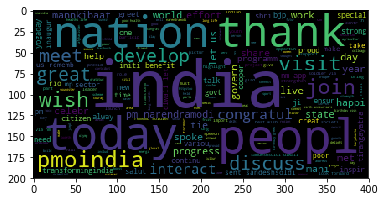

<Figure size 720x720 with 0 Axes>

In [67]:
wc=WordCloud().generate(' '.join(docs_clean))
plt.imshow(wc)


- in the above word cloud # tags are removed we ll take care of it

# HashTag Analysis

In [69]:
hashtags=[]

for row in docs_clean:
    row_words = row.split(' ')
    row_hashtags=[word for word in row_words if word.startswith('#')]
    hashtags.extend(row_hashtags)
hashtags[:50]

['#transformingindia',
 '#presidentmu',
 '#presidentmukherje',
 '#pr',
 '#presidentmukherje',
 '#presidentmukherje',
 '#presidentmukherje',
 '#',
 '#presidentmukherje',
 '#presidentmukherje',
 '#presidentmukherje',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#stressfreeexam',
 '#mannkibaat',
 '#republicday',
 '#republicday',
 '#republicday',
 '#republicday',
 '#republicday',
 '#',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#pbd',
 '#pbd',
 '#pbd',
 '#thprakashparv',
 '#thprakashparv',
 '#thprakashparv',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#mannkibaat',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#demonetis',
 '#digitalpay',
 '#digitalpay',
 '#digitalpay',
 '#digidhanmela']

In [74]:
len(np.unique(hashtags))

218

In [79]:
# frequency of hashtags
freq_hashtags= pd.Series(hashtags).value_counts()
freq_hashtags.head()

#sandeshsoldi         110
#mannkibaat            92
#tirangayatra          84
#yogaday               53
#transformingindia     52
dtype: int64

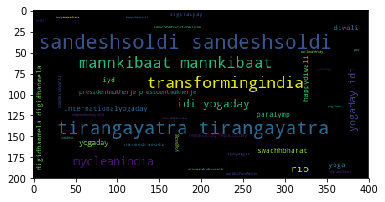

In [105]:
wc=WordCloud().generate(' '.join(hashtags))
plt.imshow(wc)



- How ferquently is modi using the hashtags
- i.e., montly,weekly according to time

# Consistency or Frequency of Hashtags of #sandeshsoldi across months

In [93]:
modi['year_month'] = modi['date'].dt.strftime('%Y-%m')
modi[['date','year_month']].head()

,date,year_month
0,2017-01-31 11:00:07,2017-01
1,2017-01-31 10:59:12,2017-01
2,2017-01-31 10:52:33,2017-01
3,2017-01-31 10:52:22,2017-01
4,2017-01-31 10:52:16,2017-01


#Now we have to check how many time the #sandeshsoldi is used

In [86]:
modi['sandeshsoldi'] =docs_clean.apply(lambda v: \
                                         1 if  'sandeshsoldi'in v else 0)
modi['sandeshsoldi'].value_counts()

0    3105
1     115
Name: sandeshsoldi, dtype: int64

#now checking for frequency

In [94]:
modi.groupby('year_month')['sandeshsoldi'].sum()


year_month
2016-03      0
2016-04      0
2016-05      0
2016-06      0
2016-07      0
2016-08      0
2016-09      0
2016-10    114
2016-11      1
2016-12      0
2017-01      0
Name: sandeshsoldi, dtype: int64

Text(0.5,1,'Trending analysis on # sandeshsoldi')

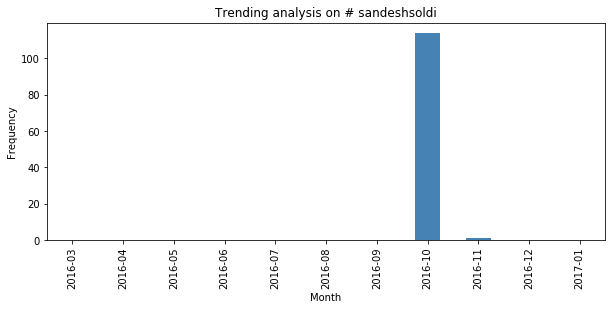

In [103]:
modi.groupby('year_month')['sandeshsoldi'].sum().plot.bar(color='steelblue',figsize=(10,4))
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title("Trending analysis on # sandeshsoldi")

In [99]:
#for transforming india
modi['transformingindia'] =docs_clean.apply(lambda v: \
                                         1 if  'transformingindia'in v else 0)
modi['transformingindia'].value_counts()

0    3151
1      69
Name: transformingindia, dtype: int64

Text(0.5,1,'Trending analysis on # transformingindia')

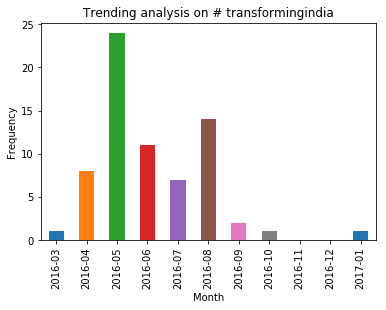

In [100]:
modi.groupby('year_month')['transformingindia'].sum().plot.bar()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title("Trending analysis on # transformingindia")

In [101]:
#for tirangayatra  
modi['tirangayatra'] =docs_clean.apply(lambda v: \
                                         1 if  'tirangayatra'in v else 0)
modi['tirangayatra'].value_counts()

0    3136
1      84
Name: tirangayatra, dtype: int64

Text(0.5,1,'Trending analysis on #tirangayatra')

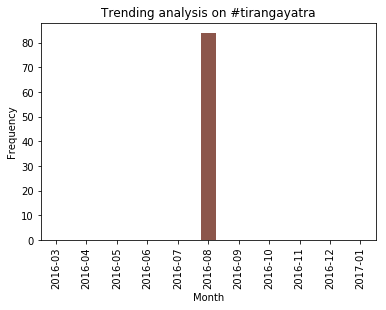

In [102]:
modi.groupby('year_month')['tirangayatra'].sum().plot.bar()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title("Trending analysis on #tirangayatra")

In [106]:
#for mannkibaat
modi['mannkibaat'] =docs_clean.apply(lambda v: \
                                         1 if  'mannkibaat'in v else 0)
modi['mannkibaat'].value_counts()

0    3126
1      94
Name: mannkibaat, dtype: int64

Text(0.5,1,'Trending analysis on #mannkibaat mannkibaat')

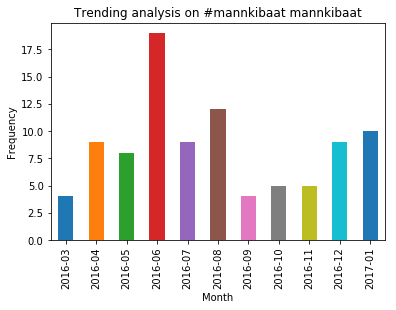

In [113]:
search_term = 'mannkibaat'
modi[search_term] =docs_clean.apply(lambda v: \
                                         1 if  search_term in v else 0)
modi.groupby('year-month')[search_term].sum().plot.bar()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Trending analysis on #mannkibaat %s' % search_term)

# Unstructured Data to structured Data

### Document Term Matrix

In [114]:
amazon =pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/amazon_reviews.csv')
amazon.shape

(999, 10)

In [116]:
amazon.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


#go to this url for data http://jmcauley.ucsd.edu/data/amazon/

In [119]:
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

0    we got this gps for my husband who is an otr o...
1    im a professional otr truck driver and i bough...
2    well what can i say  ive had this unit in my t...
3    not going to write a long review even thought ...
4    ive had mine for a year and heres what we got ...
Name: reviewText, dtype: object

In [121]:
def clean_text(row):
    row_words = row.split(' ')
    clean_words = [word for word in row_words if word if word not in stop_words]
    return ' '.join(clean_words)
docs_clean = docs.apply(clean_text)
docs_clean.head(2)

0    got gps husband otr road trucker impressed shi...
1    im professional otr truck driver bought tnd tr...
Name: reviewText, dtype: object

In [123]:
#creating dtm matrix
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
sparse_matrix = cv.fit_transform(docs_clean)
sparse_matrix
#55732 cells with non zero values
#9438 unique words

<999x9438 sparse matrix of type '<class 'numpy.int64'>'
	with 55732 stored elements in Compressed Sparse Row format>

In [128]:
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns=cv.get_feature_names())#gives column names
df_dtm.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df_dtm.shape # High dimension data

(999, 9438)

In [134]:
# Counting the no of zeros
(df_dtm==0).sum()#column sum with trues
((df_dtm==0).sum()).sum()#
((df_dtm>0).sum()).sum()# Counting the no of non zeros

9372830

In [136]:
(((df_dtm==0).sum()).sum())/(df_dtm.shape[0]*df_dtm.shape[1])
#99% having zeros i.e., sparse matrix

0.9940890243920547

#### close to 99.4% of the values in the documemnt term matrix is zero.hence it is called "sparse matrix"

# Term Frequency :Column sum

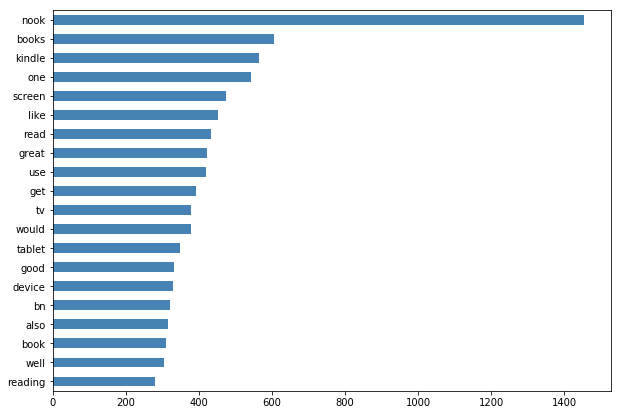

In [142]:
#df_dtm.sum()
#df_dtm.sum().sort_values(ascending=False)
df_dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh(color='steelblue',figsize=(10,7))

# Identifying biggest document

In [143]:
df_dtm.sum(axis=1).sort_values(ascending=False).head(5)

387    1064
273     971
563     766
552     703
248     689
dtype: int64

In [146]:
amazon.loc[28]['reviewText']

"I love this mount.  This is the 4th one I've bought and it works great every time.  excellent seller and excellent product"

In [147]:
amazon.loc[563]['reviewText'][:20]

'.Paid $[...] for thi'

### Correlation

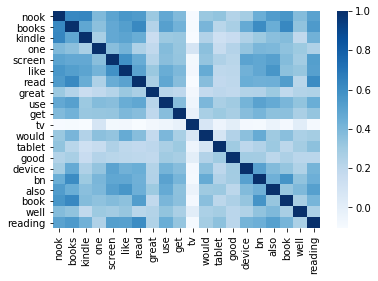

In [148]:
frequent_words = df_dtm.sum().sort_values(ascending=False).head(20).index
words_correlation = df_dtm[frequent_words].corr()
import seaborn as sns
sns.heatmap(words_correlation, cmap='Blues')

# Word Similarity (Semantic Analysis)

- similarity between two words will have cosine similarity equal to zero
- dissimilar words will have cosine similarity equal to non-zero

In [150]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity([df_dtm['book'],df_dtm['kindle']])
cos_sim

array([[1.        , 0.43291729],
       [0.43291729, 1.        ]])

In [157]:
cos_sim = pd.DataFrame(cosine_similarity(df_dtm.T),
                      index=df_dtm.columns,
                      columns=df_dtm.columns)
cos_sim.head(5)

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
aaa,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
aac,0.0,1.0,0.0,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abandoning,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abilities,0.0,0.5,0.0,1.000000,0.051848,0.032616,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.387298,0.00000,0.0,0.000000
ability,0.0,0.0,0.0,0.051848,1.000000,0.202930,0.103695,0.0,0.0,0.0,...,0.0,0.119737,0.0,0.20739,0.0,0.0,0.133870,0.20739,0.0,0.073324


In [155]:
word = 'tablet'

cos_sim_word = cos_sim[word]
cos_sim_word.sort_values(ascending=False).drop(word).head(5).index




Index(['apps', 'character', 'android', 'tablets', 'designed'], dtype='object')

In [156]:
def get_similar_words(word, cos_sim):
    cos_sim_word = cos_sim[word].sort_values(ascending=False).drop(word).head(5).index.values
    return list(cos_sim_word)

get_similar_words('touch',cos_sim)

['screen', 'kindle', 'page', 'books', 'nook']

## Bigrams

In [160]:
cv= CountVectorizer(ngram_range=(2,2#))
sparse_matrix = cv.fit_transform(docs_clean)
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix,columns=cv.get_feature_names())
df_dtm.shape

(999, 68851)

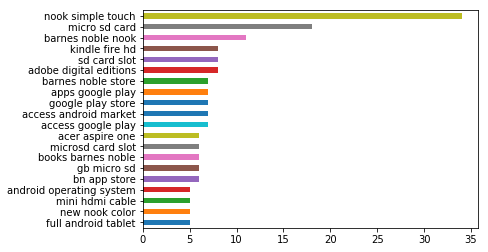

In [161]:
df_dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh()

# Trigrams

In [162]:
cv= CountVectorizer(ngram_range=(3,3))
sparse_matrix = cv.fit_transform(docs_clean)
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix,columns=cv.get_feature_names())
df_dtm.shape

(999, 68851)

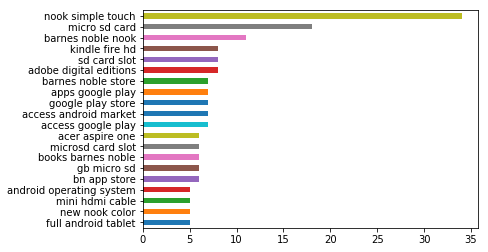

In [163]:
df_dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh()